# 1. Data Pre-processing

This stage of the project is crucial as the images must be pre-processed before they can used for training & testing in the Convolutional Neural Network.

---
## 1.1 Read in the images

Here I import the images as an array and apply a small Gaussian Blur to remove the Noise that is present in each image. The images are all stored as RGB images and must be coverted to Grayscale. To do this cv2.IMREAD_GRAYSCALE was added to import each image as grayscale.

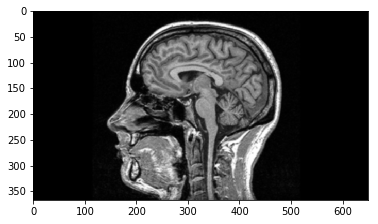

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

%matplotlib inline

DATADIR = "DATA"
CATEGORIES = ["Healthy", "Un-Healthy"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        blur = cv2.GaussianBlur(img_array,(5,5),0)
        plt.imshow(blur, cmap="gray")
        plt.show()
        break
    break

## 1.2 Print the images shape

In [3]:
print(blur.shape)

(367, 650)


## 1.3 Resizing the Images

Here I resize the images using OpenCv's resizing function which allows me to specify the new dimensions for the image. To maintain the images aspect ratio I included the parameter interpolation = cv2.INTER_AREA which keeps the images aspect ratio without adding extra borders of unncessary space to widen the image.

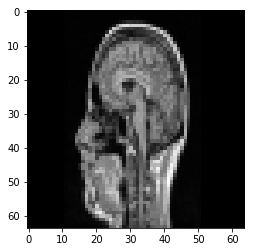

In [4]:
IMG_SIZE = 64

new_array = cv2.resize(blur, (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_AREA)
plt.imshow(new_array, cmap = "gray")
plt.show()

## 1.4 Mean & Standard Deviation

There was no easy method to import and display the grayscaled image as I had imported the images into an array. In order to achieve the images mean & standard deviation I had to re-import the data by using PIL & Glob which then allowed me to find the average image. The average image here takes the shape of a brain. This indicates that the most prominent shape in the dataset is infact the shape of the human brain.

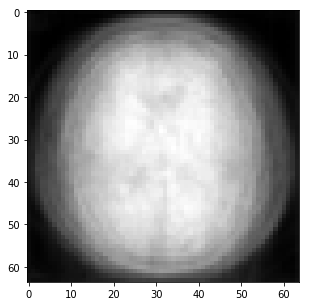

In [5]:
from PIL import Image
import glob

image_list = []

for filename in glob.glob("DATA/Healthy/*.jpg"):
    im=Image.open(filename)
    image_list.append(im)
    
w = 64
h = 64

newImagesScaled = []

for item in image_list:
    img = item.resize((w,h),Image.ANTIALIAS)
    newImagesScaled.append(img)
    
grayScale = []

for item in newImagesScaled:
    grayscaleim = item.convert('L')
    grayScale.append(grayscaleim)
    
averageim_heal = np.array(grayScale[0], 'f')

for imname in grayScale[1:]:
    averageim_heal += np.array(imname)
    
averageim_heal /= len(grayScale)

plt.rcParams['figure.figsize'] = [5, 5]
plt.imshow(averageim_heal, cmap=plt.cm.gray)
plt.show()

## 1.4 Plot a Histogram of the data

I plotted a histogram of the data to get a direct understanding of how pixel intensities are spread out in the images.

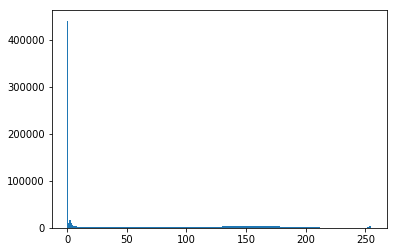

In [4]:
img = cv2.imread('DATA/Un-Healthy/cancer_01.jpg')

plt.hist(img.ravel(),256)
plt.show()

## 1.5 Creating the training set

Creating the training set allows me to join both of the image categories and then later create the Labels which will indicate which image has and has not got brain cancer. This step is simply a repeat of the previous steps but here I am finalising the my choices and resizing, grayscaling and blurring all the of the images into one single variable.

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                blur = cv2.GaussianBlur(img_array,(5,5),0)
                new_array = cv2.resize(blur, (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_AREA)
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

## 1.6 Print the length of the training data

The length of the data is 500 images. 250 being Healthy Brain scans and 250 being Un-Healthy Brain scans.

In [8]:
print(len(training_data))

500


## 1.7 Randomly shuffle the training data

Here I am randomly shuffing the data so that both categories are mixed in with one another.

In [9]:
import random

random.shuffle(training_data)

## 1.8 Print the first 10 values in the training data

In [10]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
1
1
1
0
1
1


## 1.9 Create X & y

In [11]:
X = []
y = []

## 1.10 Create the Labels 

Here I append the Data stored in the varaible training_data to the new Variable X. I also append the Labels that company each Image whiich indicates Healthy & Un-Healthy to the variable Y. 

In [12]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

## 1.11 Write the data into pickle files

Here I write the the Data into Pickle Files. There is no main reason why Pickle was chosen to read in and out the data, this process could have been done with Numpy where the data becomes Numpy files. This process would produce the same results and have no overall benefit on the dataset.

In [13]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## 1.12 Print the first the value in X

Checking for the first object stored in the variable X. 

In [64]:
X[1]

array([[[25],
        [ 8],
        [ 8],
        ...,
        [ 8],
        [ 8],
        [25]],

       [[17],
        [ 0],
        [ 0],
        ...,
        [ 0],
        [ 0],
        [17]],

       [[17],
        [ 0],
        [ 0],
        ...,
        [ 0],
        [ 0],
        [17]],

       ...,

       [[17],
        [ 0],
        [ 0],
        ...,
        [ 0],
        [ 0],
        [17]],

       [[36],
        [18],
        [17],
        ...,
        [19],
        [21],
        [30]],

       [[38],
        [24],
        [22],
        ...,
        [22],
        [22],
        [36]]], dtype=uint8)

## 1.13 Convert Images .PNG to .JPG

This script was used externally on 6 PNG images to convert them to the file format .JPG

In [ ]:
im = Image.open("------.png")
rgb_im = im.convert('RGB')
rgb_im.save('-----------.jpg')

# 2. Image Segmentation

This stage was used to research futher into pre-processing methods that could be used to segment the brain tumour from the MRI scan. However, this stage became redundant in later sections as time became an issue.

---
## 2.1 Canny Edge Detection

This step allowed mr to visualise the edges of the images. Which essentially indicate what the machine will see as the images are trained & tested using the convolutional Neural Network. Here you can see cleary the most prominent edges within the image, these edges are what the machine will interpret when training using the data.

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

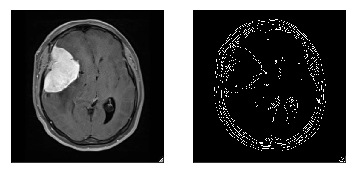

In [5]:
img = cv2.imread('DATA/Un-Healthy/cancer_08.jpg')
edges = cv2.Canny(img,100,100)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.xticks([]), plt.yticks([])

## 2.2 Binary Thresholding

Binary Thresholding is simple way to convert an image to Binary which in turn converts the images colour scheme to Black & White. Through multiple tests with this feature I discovered by using this feature some un-healthy brain scans would have their tomour segmented from the brain scan. This occurs because in the brain scan image the most intense section of light comes from the tomour as it normally appears as a white section of the image. This however was only effective for a small portion of the images. The downside of using this method is that in most brain scans the tumour will be the most intense source of light however the skull will also show as white in scans. The image below only works because the skull in this image is not very prominent in the image. The second example however shows clearly how the skull is interferring in the process of segmentation.

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

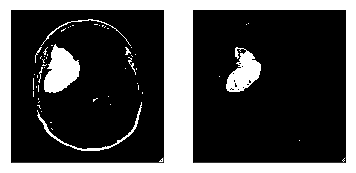

In [10]:
img = cv2.imread('DATA/Un-Healthy/cancer_08.jpg')
retval, threshold_190 = cv2.threshold(img, 190, 255, cv2.THRESH_BINARY)

plt.subplot(121),plt.imshow(threshold,cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(threshold_190,cmap = 'gray')
plt.xticks([]), plt.yticks([])

## 2.3 Skull Stripping
### 2.3.1 Import the Libraries

As the skull is un-need in the process of image segmentation. The main goal here is to remove all traces of the skull from the brain scan. After this process is complete we could ten use the Binary Thresholding technique to covert the image to Black & White with the hopes that the only remaining piece of the image would be the tumour. To achieve skull stripping the water shed algorithm was used. The code below will read in the Image and create a mask of the overall image. This mask is then used to strip the small outline of the image which is the skull. This solution would again only work for a handful of images because the dataset collected is entirely random and contains many different shapes and perspectives of the human skull. An easier way to strip the outline of the skull was to use a third application such as photoshop which would allow you to use a cropping tool to remove the skull from the image which would have the same overall effect as using the code below.

In [1]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater

### 2.3.2 Read in the Image

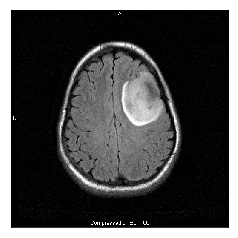

In [6]:
img = cv2.imread('DATA/Un-Healthy/cancer_69.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = "gray")
plt.xticks([]), plt.yticks([])
plt.show()

### 2.3.3 Extract the Image Mask

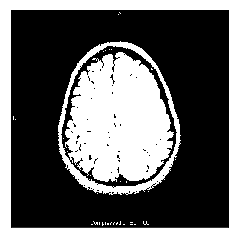

In [7]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
plt.imshow(thresh, cmap = "gray")
plt.xticks([]), plt.yticks([])
plt.show()

### 2.3.4 Place Mask over Original Image

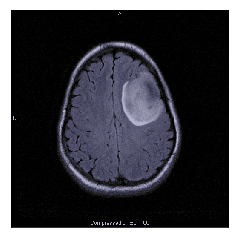

In [8]:
colormask = np.zeros(img.shape, dtype=np.uint8)
colormask[thresh!=0] = np.array((0,0,255))
blended = cv2.addWeighted(img,0.7,colormask,0.1,0)

plt.imshow(blended, cmap = "gray")
plt.xticks([]), plt.yticks([])
plt.show()

### 2.3.5 Extract the Brain

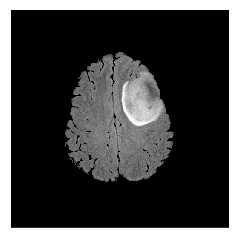

In [10]:
ret, markers = cv2.connectedComponents(thresh)

#Get the area taken by each component. Ignore label 0 since this is the background.
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
#Get label of largest component by area
largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above                        
#Get pixels which correspond to the brain
brain_mask = markers==largest_component

brain_out = img.copy()
#In a copy of the original image, clear those pixels that don't correspond to the brain
brain_out[brain_mask==False] = (0,0,0)

plt.imshow(brain_out, cmap = "gray")
plt.xticks([]), plt.yticks([])
plt.show()